# OBJETIVO: Analizar y predecir el ausentismo por turno y colaborador de Enfermería en el servicio de Internación General, como así la contratación por horas banco y horas extras según valor

### Contexto comercial
#### Las dotaciones de enfermeros prestablecida podría tener una oportunidad de mejora, a partir de un modelo predictivo en el cual estime el ausentismo del personal de Enfermería y las coberturas generadas. Contratando el personal adecuado sin generar capacidad ociosa, se podrían reducir las horas extras a pagar que son más caras que las horas contratadas. 

### Problema comercial
#### En el contexto económico actual, se requiere revisar estrategias de contención de costos sin vulnerar la capacidad asistencial de Enfermería, disminuyendo las horas extras contratadas. 

### Contexto analítico 
#### El servicio de Internación General está compuesto por una capacidad instalada de 150 camas y una estructura de 204 colaboradores entre ayudantes de Enfermería y enfermeros, repartidos en 5 turnos (TM, TT, TNA, TNB y SDF)


In [63]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://github.com/matisolica/Proyecto-final-DS1/raw/bd6cb31c2509e8c662132e43d728f7f5bcd364f5/Matias%20Isolica%20Dataset%20-%20Ausentismo%20y%20coberturas%20Enfermeria%202023.xlsx'
dbexcel = pd.read_excel(url, sheet_name=None)

In [64]:
#printeo los nombres de las hojas del xlsx
print(dbexcel.keys())

dict_keys(['Tb_Coberturas', 'Tb_Ausentismo', 'Tb_Nomina', 'Tb_Motivos', 'Tb_FormaDeCobertura', 'Tb_Turnos', 'Tb_Servicios', 'Tb_Categorias', 'Tb_Localidades'])


In [65]:
#asigno nombre de variable a cada hoja del xlsx
df_cob = dbexcel['Tb_Coberturas'] #Muestra las coberturas generadas en función del ausentismo
df_aus = dbexcel['Tb_Ausentismo'] #Muestra los colaboradores que se ausentaron
df_nom = dbexcel['Tb_Nomina'] #Muestra la nómina de colaboradores
df_mot = dbexcel['Tb_Motivos'] #Muestra los motivos nominalizados de ausencia
df_formcob = dbexcel['Tb_FormaDeCobertura'] #Muestra las formas de cobertura existentes
df_tur = dbexcel['Tb_Turnos'] #Muestra los turnos existentes
df_ser = dbexcel['Tb_Servicios'] #Muestra los servicios asistenciales existentes en el sanatorio
df_cat = dbexcel['Tb_Categorias'] #Muestra las categorías profesionales existentes en la estructura de Enfermería
df_loc = dbexcel['Tb_Localidades'] #Muestra las localidades en las que al menos un colaborador reside

In [66]:
print(df_cob.isnull().sum())

ID                       0
FormaDeCoberturaID       0
Legajo_Reemplazo      3318
Cant_Hs                  0
TurnoID2              3318
dtype: int64


In [67]:
print(df_nom.isnull().sum())

LEGAJO           0
COLABORADOR      0
LocalidadID    135
ServicioID       1
CategoriaID      1
TurnoID          1
dtype: int64


In [68]:
print(df_aus.isnull().sum())

ID             0
Año            0
Mes            0
Fecha          0
Día            0
Legajo         0
CategoriaID    1
TurnoID        0
MotivoID       1
Cant_Hs        0
dtype: int64


In [69]:
print(df_mot.isnull().sum())

MotivoID    0
Motivo      0
dtype: int64


In [70]:
print(df_formcob.isnull().sum())

FormaDeCoberturaID    0
FormaDeCobertura      0
dtype: int64


In [71]:
print(df_tur.isnull().sum())

TurnoID    0
Turno      0
dtype: int64


In [72]:
print(df_ser.isnull().sum())

ServicioID    0
Servicio      0
dtype: int64


In [73]:
print(df_cat.isnull().sum())

CategoriaID    0
Categoria      0
dtype: int64


In [74]:
print(df_loc.isnull().sum())

LocalidadID    0
Localidad      0
Zona           0
dtype: int64


### Presentación de las categorías de cada df

In [75]:
print(f'Categorías df_aus: ',(df_aus.columns))
print()
print(f'Categorías df_cob: ', (df_cob.columns))
print()
print(f'Categorías df_nom: ',(df_nom.columns))
print()
print(f'Categorías df_mot: ',(df_mot.columns))
print()
print(f'Categorías df_formcob: ',(df_formcob.columns))
print()
print(f'Categorías df_tur: ',(df_tur.columns))
print()
print(f'Categorías df_ser: ',(df_ser.columns))
print()
print(f'Categorías df_cat: ',(df_cat.columns))
print()
print(f'Categorías df_loc: ',(df_loc.columns))
print()

Categorías df_aus:  Index(['ID', 'Año', 'Mes', 'Fecha', 'Día', 'Legajo', 'CategoriaID', 'TurnoID',
       'MotivoID', 'Cant_Hs'],
      dtype='object')

Categorías df_cob:  Index(['ID', 'FormaDeCoberturaID', 'Legajo_Reemplazo', 'Cant_Hs', 'TurnoID2'], dtype='object')

Categorías df_nom:  Index(['LEGAJO', 'COLABORADOR', 'LocalidadID', 'ServicioID', 'CategoriaID',
       'TurnoID'],
      dtype='object')

Categorías df_mot:  Index(['MotivoID', 'Motivo'], dtype='object')

Categorías df_formcob:  Index(['FormaDeCoberturaID', 'FormaDeCobertura'], dtype='object')

Categorías df_tur:  Index(['TurnoID', 'Turno'], dtype='object')

Categorías df_ser:  Index(['ServicioID', 'Servicio'], dtype='object')

Categorías df_cat:  Index(['CategoriaID', 'Categoria'], dtype='object')

Categorías df_loc:  Index(['LocalidadID', 'Localidad', 'Zona'], dtype='object')



In [76]:
#Visualizar el encabezado del df_cob
df_cob.head()

,ID,FormaDeCoberturaID,Legajo_Reemplazo,Cant_Hs,TurnoID2
0,1,6,NaN,7.0,NaN
1,2,6,NaN,7.0,NaN
2,3,6,NaN,7.0,NaN
3,4,6,NaN,7.0,NaN
4,5,4,7942.0,7.0,4.0


### Primer gráfico: barplot Ausentismo 2023 según forma de cobertura

#### Muestran las horas de ausentismo del 2023 categorizadas por la forma en las que se cubrieron

In [77]:
#Visualizar el df df_formcob
df_formcob

,FormaDeCoberturaID,FormaDeCobertura
0,1,Banco de Horas
1,2,Cambio de Guardia
2,3,Cambio de Turno
3,4,Horas Extras
4,5,Plus x Referente
5,6,Sin Cobertura
6,7,Transferencia


In [78]:
#Joinear los df df_cob y df_formcob. Luego creo df_cob_grouped con las categorías no normalizadas y sumando el total de horas por categoría en el año

df_cob_merged = df_cob.merge(df_formcob, on='FormaDeCoberturaID')
df_cob_grouped = df_cob_merged.groupby('FormaDeCobertura')['Cant_Hs'].sum().reset_index()
print(df_cob_grouped)

     FormaDeCobertura  Cant_Hs
0      Banco de Horas   6988.0
1  Cambio de Guardia    8995.0
2     Cambio de Turno   2429.5
3        Horas Extras  34403.0
4    Plus x Referente   3409.5
5       Sin Cobertura  25944.5
6       Transferencia   2400.0


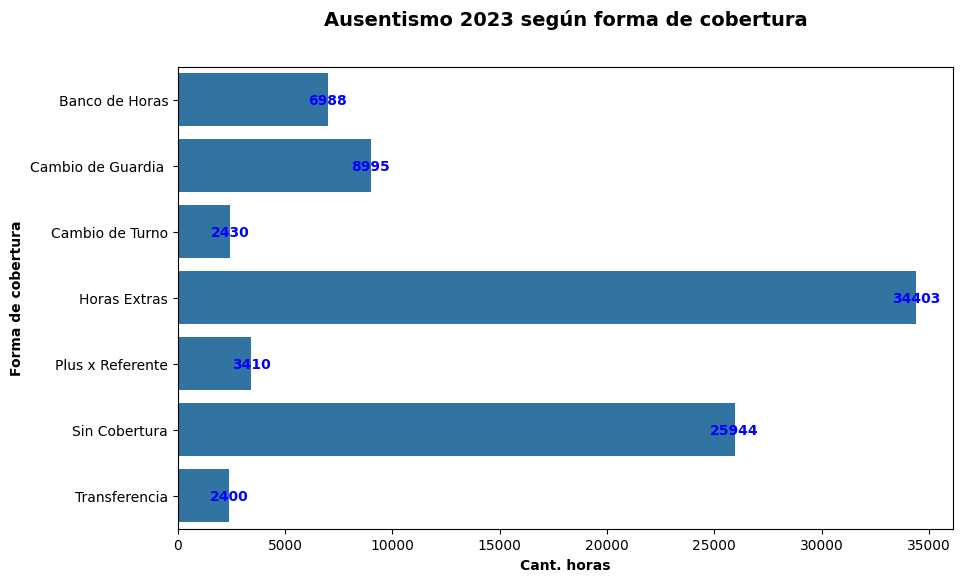

In [79]:
# Grafico 1 MatPlotLib - Ausentismo 2023 según forma de cobertura

plt.figure(figsize=(10,6))
sns.barplot(y = 'FormaDeCobertura', x = 'Cant_Hs', data = df_cob_grouped)
plt.title("Ausentismo 2023 según forma de cobertura", 
             fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Cant. horas', fontsize = 10, fontweight = 'bold')
plt.ylabel('Forma de cobertura', fontsize = 10, fontweight = 'bold')
ax = plt.gca() #obtengo el eje
for p in ax.patches: #ax.patches obtengo las barras
    valores = p.get_width() #obtengo el valor de la barra
    ax.text(valores + 5, p.get_y() + p.get_height()/2, f'{valores:.0f}', #agrega texto (valores) al grafico y posiciono los valores verticalmente en el centro de la barra
            ha = 'center', va = 'center', fontsize = 10, fontweight = 'bold', color = 'blue')

plt.show()

### Segundo gráfico: barplot de ausentismo mensual, bivariado según turno (hue)

#### Muestra el evolutivo mensual de las horas de ausentismo generadas según turno

In [80]:
#Muestro df de ausentismo

df_aus.head()

,ID,Año,Mes,Fecha,Día,Legajo,CategoriaID,TurnoID,MotivoID,Cant_Hs
0,1,2023,Enero,2,Lunes,7508,1.0,1,12.0,7.0
1,2,2023,Enero,2,Lunes,8783,1.0,1,12.0,7.0
2,3,2023,Enero,2,Lunes,9305,1.0,1,12.0,7.0
3,4,2023,Enero,2,Lunes,11546,1.0,1,12.0,7.0
4,5,2023,Enero,2,Lunes,11227,1.0,1,3.0,7.0


In [81]:
#muestro df de las categorías de turno
df_tur

,TurnoID,Turno
0,1,TM
1,2,TT
2,3,TNA
3,4,TNB
4,5,SDF


In [82]:
#Joineo los dos df y creo uno nuevo con groupby con las categorías que necesito, sumando las horas totales para las categorías definidas
df_aus_merged = df_aus.merge(df_tur, on='TurnoID')
df_aus_grouped = df_aus_merged.groupby(['Turno', 'Mes'])['Cant_Hs'].sum().reset_index()

#Creo lista con los meses ordenados por calendario (ordinal)
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

#Creo lista con los turnos ordenados (ordinal)
orden_turnos = ['TM', 'TT', 'TNA', 'TNB', 'SDF']

#Asigno la lista ordinal orden_meses a la categoría 'Mes' del df_aus
df_aus_grouped['Mes'] = pd.Categorical(df_aus_grouped['Mes'], categories=orden_meses, ordered=True)

#Asigno la lista ordinal orden_turnos a la categoría 'Turno' del df_aus
df_aus_grouped['Turno'] = pd.Categorical(df_aus_grouped['Turno'], categories=orden_turnos, ordered=True)

#Asigno variables para crear los filtros para obtener las horas totales según cada turno
filtroTM = df_aus_merged['Turno'] == 'TM'
filtroTT = df_aus_merged['Turno'] == 'TT'
filtroTNA = df_aus_merged['Turno'] == 'TNA'
filtroTNB = df_aus_merged['Turno'] == 'TNB'
filtroSDF = df_aus_merged['Turno'] == 'SDF'

print(df_aus_grouped.head())

  Turno        Mes  Cant_Hs
0   SDF      Abril   1717.0
1   SDF     Agosto   1038.5
2   SDF  Diciembre   2048.5
3   SDF      Enero   1464.0
4   SDF    Febrero   1961.0


In [83]:
#Filtro con .loc para obtener dataframes que pueda manipular para el gráfico
df_aus_TM = df_aus_merged.loc[filtroTM,:]
df_aus_TT = df_aus_merged.loc[filtroTT,:]
df_aus_TNA = df_aus_merged.loc[filtroTNA,:]
df_aus_TNB = df_aus_merged.loc[filtroTNB,:]
df_aus_SDF = df_aus_merged.loc[filtroSDF,:]

#Creo los valores de las medias mensuales de cada turno, que luego usaré como lineas horizontales
suma_hs_TM = df_aus_TM['Cant_Hs'].sum()
media_mensual_TM = suma_hs_TM / 12

suma_hs_TT = df_aus_TT['Cant_Hs'].sum()
media_mensual_TT = suma_hs_TT / 12

suma_hs_TNA = df_aus_TNA['Cant_Hs'].sum()
media_mensual_TNA = suma_hs_TNA / 12

suma_hs_TNB = df_aus_TNB['Cant_Hs'].sum()
media_mensual_TNB = suma_hs_TNB / 12

suma_hs_SDF = df_aus_SDF['Cant_Hs'].sum()
media_mensual_SDF = suma_hs_SDF / 12


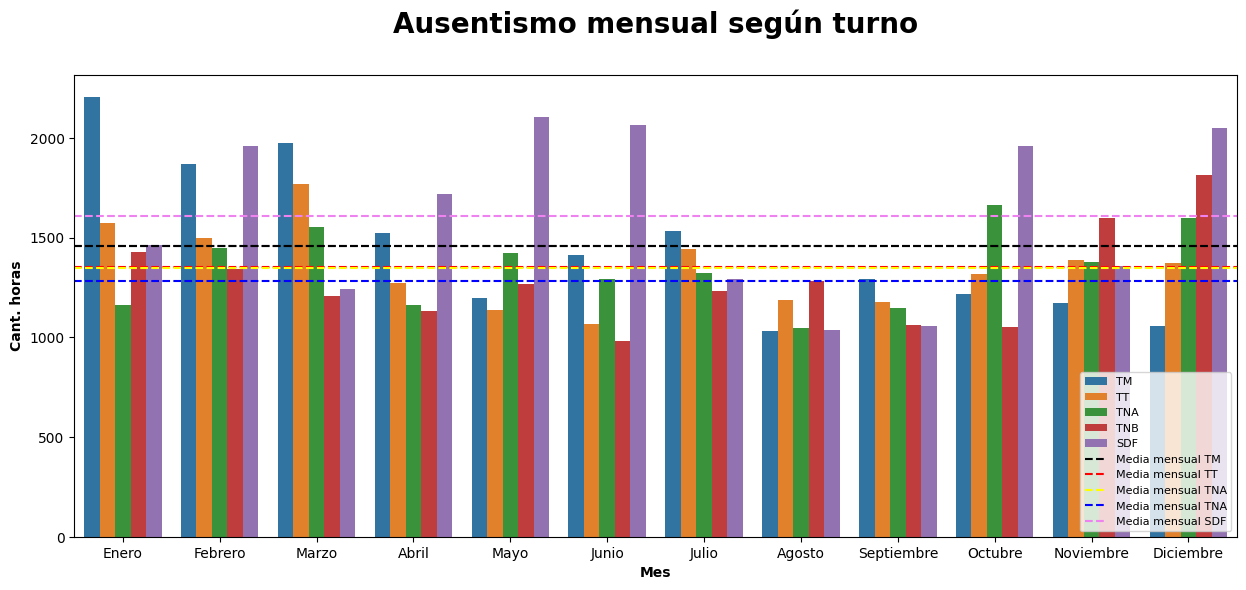

In [84]:
#Creo el gráfico

plt.figure(figsize=(15,6))
sns.barplot(y = 'Cant_Hs', x = 'Mes', hue= 'Turno', data = df_aus_grouped)
plt.title('Ausentismo mensual según turno',
          fontsize = 20, fontweight = 'bold', pad= 30)

plt.ylabel('Cant. horas', fontweight = 'bold')
plt.xlabel('Mes', fontweight = 'bold')

plt.axhline(y = media_mensual_TM,
            color = 'black',
            linestyle = '--')

plt.axhline(y = media_mensual_TM,
            color = 'black',
            linestyle = '--',
            label = 'Media mensual TM')

plt.axhline(y = media_mensual_TT,
            color = 'red',
            linestyle = '--',
            label = 'Media mensual TT')

plt.axhline(y = media_mensual_TNA,
            color = 'yellow',
            linestyle = '--',
            label = 'Media mensual TNA')

plt.axhline(y = media_mensual_TNB,
            color = 'blue',
            linestyle = '--',
            label = 'Media mensual TNA')

plt.axhline(y = media_mensual_SDF,
            color = 'violet',
            linestyle = '--',
            label = 'Media mensual SDF')

plt.legend(loc='lower right',
           fontsize = 8)
plt.show()

### Gráfico radar Horas extras según turno

In [85]:
#Creo el df joineando los ID para obtener los registros con la categoría del turno donde se generó cada ausente, y las horas contratadas filtradas por horas extras
ID_registros_aus = df_aus_merged[['ID', 'Turno']]
ID_registros_cob = df_cob_merged[['ID', 'FormaDeCobertura', 'Cant_Hs']]
ID_merged = ID_registros_aus.merge(ID_registros_cob, on= 'ID')
filtro_extras = ID_merged['FormaDeCobertura'] == 'Horas Extras'
df_extras = ID_merged.loc[filtro_extras,:]
df_extras.head()

,ID,Turno,FormaDeCobertura,Cant_Hs
4,5,TM,Horas Extras,7.0
14,15,TM,Horas Extras,7.0
15,16,TM,Horas Extras,7.0
21,22,TM,Horas Extras,7.0
22,23,TM,Horas Extras,7.0


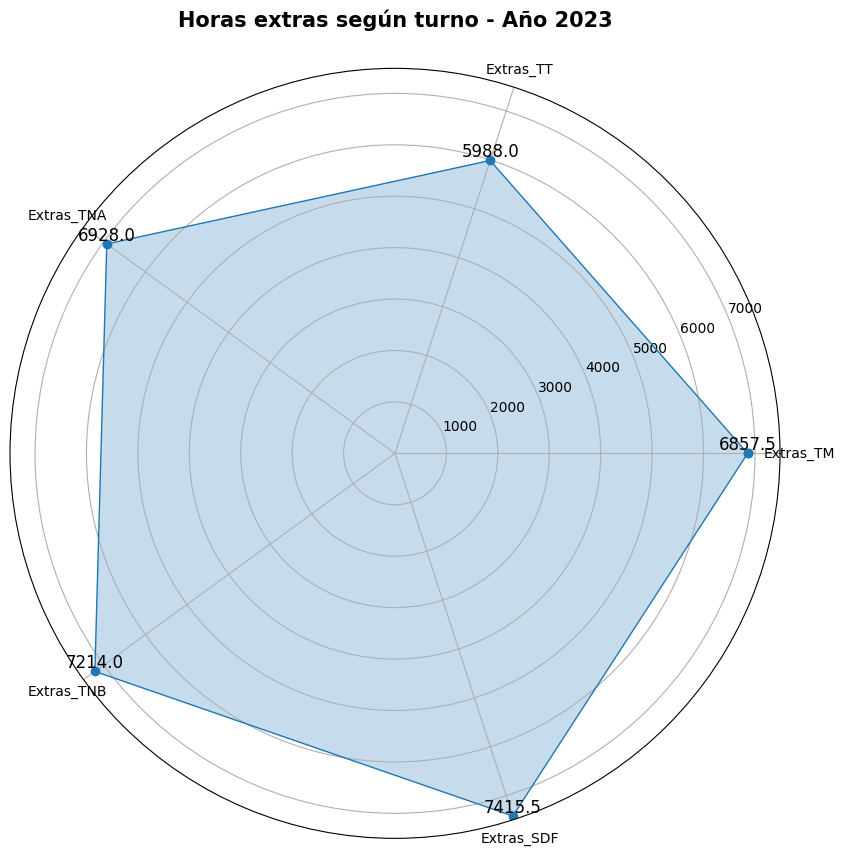

In [86]:
# Defino las categorías
categorias = ['Extras_TM', 'Extras_TT', 'Extras_TNA', 'Extras_TNB', 'Extras_SDF']

# Filtro y calculo los totales por turno
TMfiltro = df_extras['Turno'] == 'TM'
Extras_TM = df_extras.loc[TMfiltro, 'Cant_Hs'].sum()

TTfiltro = df_extras['Turno'] == 'TT'
Extras_TT = df_extras.loc[TTfiltro, 'Cant_Hs'].sum()

TNAfiltro = df_extras['Turno'] == 'TNA'
Extras_TNA = df_extras.loc[TNAfiltro, 'Cant_Hs'].sum()

TNBfiltro = df_extras['Turno'] == 'TNB'
Extras_TNB = df_extras.loc[TNBfiltro, 'Cant_Hs'].sum()

SDFfiltro = df_extras['Turno'] == 'SDF'
Extras_SDF = df_extras.loc[SDFfiltro, 'Cant_Hs'].sum()

# genero los valores
valores = [Extras_TM, Extras_TT, Extras_TNA, Extras_TNB, Extras_SDF]

# Creo los ángulos del radar
n_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, n_categorias, endpoint=False).tolist()
angulos += angulos[:1]  # cerrar el gráfico

# Agrego el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Creo el gráfico radar
radar = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Dibujo los datos
ax.plot(angulos, valores, 'o-', linewidth=1)
ax.fill(angulos, valores, alpha=0.25)

# Personalización de los ángulos y etiquetas en el eje radial
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias)

# Agrego los valores en cada punto de las variables en el gráfico
for i, valor in enumerate(valores[:-1]):  # Excluir el último valor repetido
    angulo = angulos[i]
    ax.text(angulo, valor + 0.3, str(valor), color='black', size=12, 
            horizontalalignment='center', verticalalignment='bottom')

plt.title('Horas extras según turno - Año 2023', 
          fontsize=15, fontweight='bold', pad=30)

plt.show()


In [87]:
#Nomina por localidad y turno
df_loc_merged = df_nom.merge(df_loc, on='LocalidadID')
df_loc_merged = df_loc_merged.merge(df_tur, on='TurnoID')

#Asigno la lista ordinal orden_turnos a la categoría 'Turno' del df_aus
df_loc_merged['Turno'] = pd.Categorical(df_loc_merged['Turno'], categories=orden_turnos, ordered=True)

df_loc_merged = df_loc_merged.groupby(['Turno', 'Zona'])['Zona'].count().reset_index(name='Total')
df_loc_merged

C:\Users\matis\AppData\Local\Temp\ipykernel_19264\2241365204.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_loc_merged = df_loc_merged.groupby(['Turno', 'Zona'])['Zona'].count().reset_index(name='Total')


,Turno,Zona,Total
0,TM,Centro,18
1,TM,Norte,2
2,TM,Norte-Oeste,3
3,TM,Oeste,7
4,TM,Sur,18
5,TM,Sur-Oeste,3
6,TT,Centro,16
7,TT,Norte,4
8,TT,Norte-Oeste,3
9,TT,Oeste,12


C:\Users\matis\AppData\Local\Temp\ipykernel_19264\3981075136.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_loc_merged.pivot_table(index='Zona', columns='Turno', values='Total', aggfunc='sum')


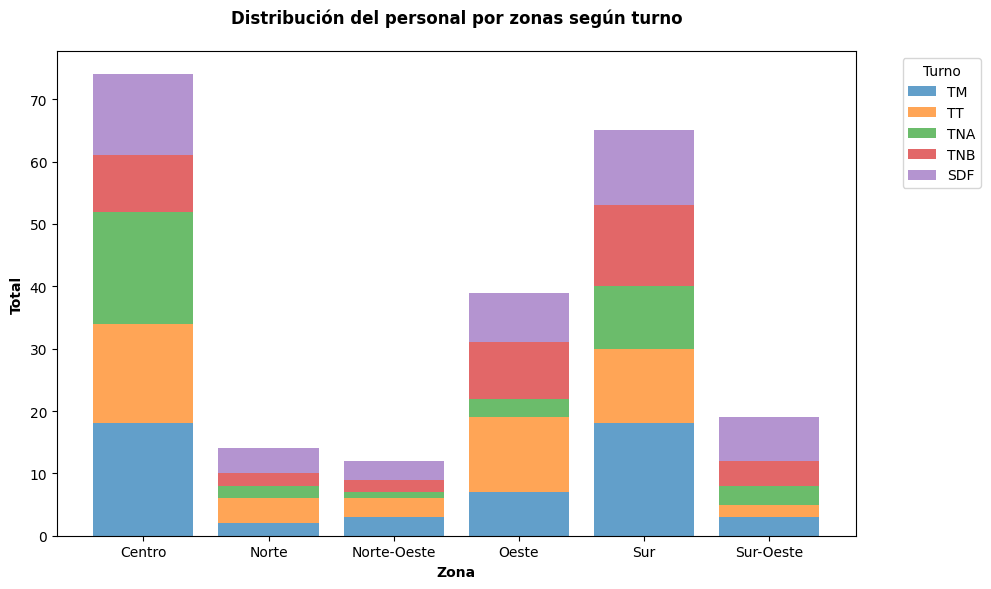

In [88]:
# Crear una figura y un eje
plt.figure(figsize=(10, 6))

# Agrupar y pivotar los datos para crear el gráfico de barras apiladas
df_pivot = df_loc_merged.pivot_table(index='Zona', columns='Turno', values='Total', aggfunc='sum')

# Dibujar cada barra apilada
bottom_values = None
for turno in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[turno], bottom=bottom_values, label=turno, alpha = 0.7)
    bottom_values = (df_pivot[turno] if bottom_values is None else bottom_values + df_pivot[turno])

# Añadir título y etiquetas
plt.title('Distribución del personal por zonas según turno', fontweight='bold', pad=20)
plt.ylabel('Total', fontweight='bold')
plt.xlabel('Zona', fontweight='bold')

# Añadir leyenda
plt.legend(title='Turno', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
